<h1 align="center">  Descision Tree </h1>


## Entropy
Entropy is a measure of the randomness or uncertainty in a set of data.

Entropy comes from physics and to explain it, we'll use the example of the three states of water. These are

- **Solid:** Ice is pretty rigid in that its particles don't have many places to go. They mostly stay where they are.
     - The entropy of ice is low
- **Liquid:** Water is a little less rigid in which a particle has a few places to move around.
     - The entropy of liquid water is medium 
- **Gas:** Water vapor is at the other end of the spectrum and a particle can move about relatively freely.
     - The entropy of water vapor is high
     
$
\text{Entropy} = -\left(\frac{m}{m+n}\log_2\left(\frac{m}{m+n}\right) + \frac{n}{m+n}\log_2\left(\frac{n}{m+n}\right)\right)
$

### Multi-class Entropy

We can state this in terms of probabilities instead for the number of red balls as $p_1$ and the number of blue balls as $p_2$:

$p_1 = \frac{m}{m+n}$

$p_2 = \frac{m}{m+n}$

$\text{Entropy} = -p_1 \log_2(p_1) - p_2 \log_2(p_2)$

This entropy equation can be extended to the multi-class case, where we have three or more possible values:


$\text{Entropy} = -p_1 \log_2(p_1) - p_2 \log_2(p_2) .... -p_n \log_2(p_n) = -\sum_{i=1}^{n} p_i \log_2(p_i)$

The minimum value is still 0 when all elements are of the same value. The maximum value is still achieved when the outcome probabilities are the same, but the upper limit increases with the number of different outcomes.

##  Information Gain

Information gain is a measure used to evaluate the importance of a feature in the classification or regression process. It quantifies the reduction in entropy or impurity that results from splitting a dataset based on a particular feature.


$\text{Information Gain} = \text{Entropy}(\text{Parent}) - \left[\frac{m}{m+n}\text{Entropy}(\text{Child}_1) + \frac{n}{m+n}\text{Entropy}(\text{Child}_2)\right]$


###  Quiz for Maximizing Information Gain

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('datasets/information_gain.csv')
data.head()

,Species,Color,Length (mm)
0,Mobug,Brown,11.6
1,Mobug,Blue,16.3
2,Lobug,Blue,15.1
3,Lobug,Green,23.7
4,Lobug,Blue,18.4


In [2]:
data.Species.value_counts()

Lobug    14
Mobug    10
Name: Species, dtype: int64

In [3]:
data.Color.value_counts()

Blue     10
Green     8
Brown     6
Name: Color, dtype: int64

**Q** Which of the following splitting criteria provides the most information gain for discriminating Mobugs from Lobugs? <br>
**Ans** Length  < 17.0mm

In [4]:
def two_group_ent(first, tot):                        
    return -(first/tot*np.log2(first/tot) +  (tot-first)/tot*np.log2((tot-first)/tot))

tot_ent = two_group_ent(10, 24)                       
tot_ent

0.9798687566511528

### Hyperparameters for Decision Trees

In order to create decision trees that will generalize to new problems well, we can tune a number of different aspects about the trees. We call the different aspects of a decision tree **"hyperparameters"**.

- 1. **Maximum Depth** <br>
The maximum depth of a decision tree is simply the largest possible length between the root to a leaf. A tree of maximum length kk can have at most $2^k $ leaves.
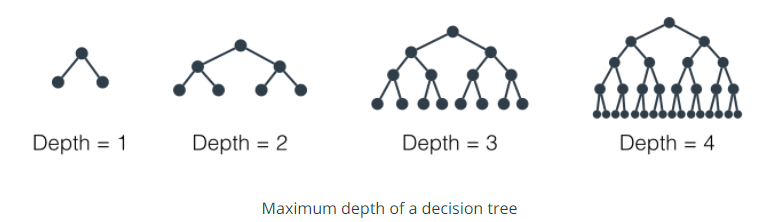

- 2.**Minimum number of samples to split** <br>
A node must have at least `min_samples_split` samples in order to be large enough to split. If a node has fewer samples than `min_samples_split` samples, it will not be split, and the splitting process stops.
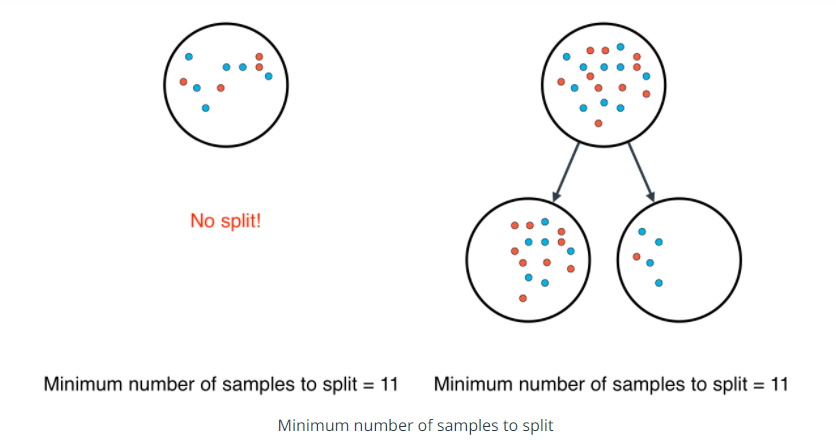

- 3. **Minimum number of samples per leaf** <br>
When splitting a node, one could run into the problem of having 99 samples in one of them, and 1 on the other. This will not take us too far in our process, and would be a waste of resources and time. If we want to avoid this, we can set a minimum for the number of samples we allow on each leaf.
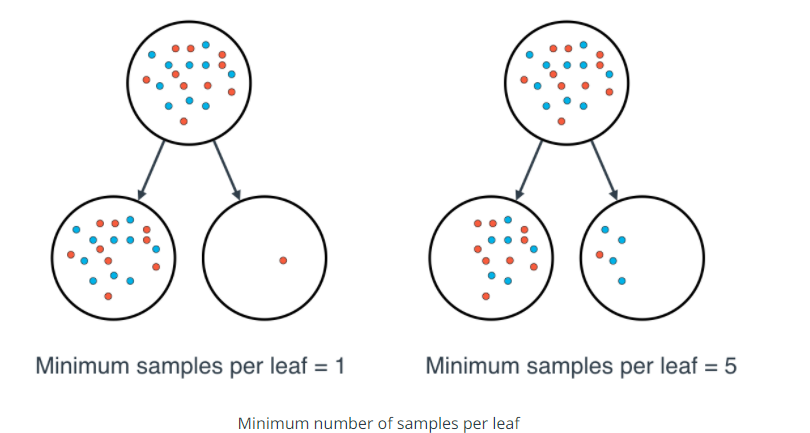

This number can be specified as an integer or as a float. If it's an integer, it's the minimum number of samples allowed in a leaf. If it's a float, it's the minimum percentage of samples allowed in a leaf. For example, 0.1, or 10%, implies that a particular split will not be allowed if one of the leaves that results contains less than 10% of the samples in the dataset.

## Decision Trees in sklearn

**Decision Tree Quiz** <br>
In this quiz, you'll be given the following sample dataset, and your goal is to define a model that gives 100% accuracy on it.
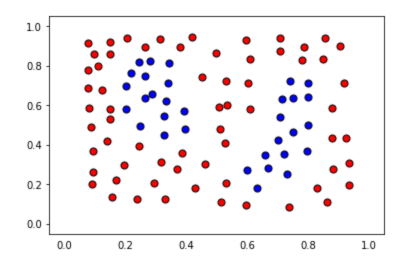



In [5]:
# Import statements 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
# Read the data.
data = np.asarray(pd.read_csv('datasets/desicion_tree_18.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

### 1. Build a decision tree model

Create a decision tree classification model using **scikit-learn's** `DecisionTreeClassifier` and assign it to the variable `model`.

In [7]:
# Create the decision tree model and assign it to the variable model.
model = DecisionTreeClassifier()

### 2. Fit the model to the data

You won't need to specify any of the **hyperparameters**, since the default ones will yield a model that perfectly classifies the training data.

In [8]:
# Fit the model.
model.fit(X,y)

DecisionTreeClassifier()

### 3. Predict using the model

Predict the labels for the training set, and assign this list to the variable `y_pred`.

In [9]:
# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### 4. Calculate the accuracy of the model

For this, use the function sklearn function `accuracy_score`. A model's **accuracy** is the fraction of all data points that it correctly classified.

In [10]:
# Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)
acc

1.0